# **<ins>Bootstrap Aggregation</ins>**
**Type of Content** : Documentation

**Domain** : Machine Learning

**Module** : Ensemble based Learning & Probabilistic ML

Bootstrap aggregation, or bagging, is a popular ensemble method that fits a decision tree on different bootstrap samples of the training dataset. This technique reduces overfitting of the model and handles missing values effectively.
<br>Let's understand how bagging works with following diagram:
<img src="https://cdn.inblog.in/user/uploads/b8d6e32cb5c1dbdb648eae77b109cdf1.jpg" style="width:70%">

Consider a dataset with N observations and M features. Now sample from data is drawn with replacement which contains both observations and features. Similarly, certain number of subsets of data are collected with replacement known as Bootstrap samples. <br>
These bootstrap samples are now used for training the model parallely. The prediction obtained from all these models are aggregated in order to get the final outcome known as aggregation. Incase of classification, Voting is used. 

The structure of the bagging procedure can be divided into three essential elements:

- Different Training Datasets: Create a different sample of the training dataset for each ensemble model.
- High-Variance Model: Train the same high-variance model on each sample of the training dataset.
- Average Predictions: Use statistics to combine predictions.

Here we will implement <b>Bagging for Classification</b>:

### Create dataset
First we will create a synthetic binary classification problem with 1,000 examples and 20 input features.

In [2]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


### Evaluate a Bagging algorithm on the dataset

We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

In [3]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.858 (0.041)


### make predictions for classification

The bagging ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

In [4]:
# make predictions using bagging for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
# dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
model = BaggingClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-4.7705504,-1.88685058,-0.96057964,2.53850317,-6.5843005,3.45711663,-7.46225013,2.01338213,-0.45086384,-1.89314931,-2.90675203,-0.21214568,-0.9623956,3.93862591,0.06276375,0.33964269,4.0835676,1.31423977,-2.17983117,3.1047287]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


## Bagging Hyperparameters
There are various parameters which can be considered tuning for the Bagging ensemble and their effect on model performance. We will explore the number of decision trees used in the ensemble.

Generally, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Bagging and related ensemble of decision trees algorithms (like random forest) appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

Here we are exploring the effect of the number of trees with values between 10 to 1000. A box and whisker plot is created for the distribution of accuracy scores for each configured number of trees.

10 0.863 (0.037)
50 0.874 (0.036)
100 0.884 (0.038)
500 0.883 (0.041)
1000 0.886 (0.037)


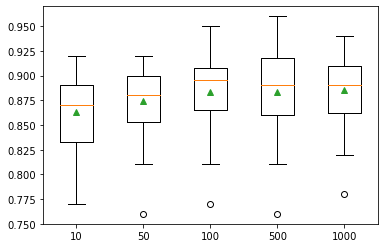

In [8]:
# explore bagging ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return X, y

# list of models to evaluate
def get_models():
    models = dict()
    # number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

# evaluate model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # display the performance parallely
    print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## References
- https://machinelearningmastery.com/essence-of-bootstrap-aggregation-ensembles/
- https://corporatefinanceinstitute.com/resources/knowledge/other/bagging-bootstrap-aggregation/